#### 引库，设置绘图参数

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

#### 读取数据

In [33]:
## 读取数据
path = '/Users/显/Desktop/作业/机器学习/ex2data1.txt'
import pandas as pd
data = pd.read_csv(path,header=None) ## data 是dataframe 的数据类型。pd.read.csv()用于读取CSV(逗号分隔)格式的数据文件并转换为DataFrame(表格类)对象

cols = data.shape[1]
## iloc()函数用于对数据进行索引和切片，参数以逗号分隔
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:,cols-1:]#Y是所有行，最后一列

data.describe() ## 查看数据的统计信息

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### 数据划分

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=50)

(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

((80, 2), (20, 2), (80, 1), (20, 1))

#### 计算最大值，最小值，均值，方差

#### 进行标准化

In [35]:
data_min=np.min(X_train[0])
data_max=np.max(X_train[0])
data_mean=np.mean(X_train[0])
data_variance=np.var(X_train[0],axis=0)

data_min=np.min(X_train[1])
data_max=np.max(X_train[1])
data_mean=np.mean(X_train[1])
data_variance=np.var(X_train[1],axis=0)

#X_train[0]=(X_train[0]-data_mean)/data_variance
#X_train[1]=(X_train[1]-data_mean)/data_variance
#X_test[0]=(X_test[0]-data_mean)/data_variance
#X_test[1]=(X_test[1]-data_mean)/data_variance

X_train[0]=(X_train[0]-data_min)/(data_max-data_min)
X_train[1]=(X_train[1]-data_min)/(data_max-data_min)
X_test[0]=(X_test[0]-data_min)/(data_max-data_min)
X_test[1]=(X_test[1]-data_min)/(data_max-data_min)

#### 散点图可视化原始数据与归一化数据

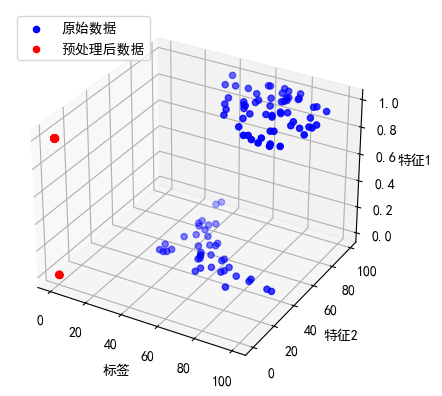

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
ax.scatter(data[0], data[1], data[2], c='b',label='原始数据')
ax.scatter(X_train[0], X_train[1], y_train[2], c='r',label='预处理后数据')

ax.legend(loc=2)
ax.set_zlabel('特征1')
ax.set_ylabel('特征2')
ax.set_xlabel('标签')
plt.show()

#### X数组中加一列

In [37]:
X_train.insert(0, 'Ones', 1) # 是在X_data这个数据集第一列（即索引为零位置）插入一个全零的列，列名为‘Ones’，此列用作线性回归模型的截距项。表示当所有特征值为零是，模型预测值为多少。能确保模型能够学习到截距项，提高模型预测精度。
X_test.insert(0, 'Ones', 1)


X=X_train.values # 返回Narray类型对象（N维数组吧）
Y=y_train.values
W=np.array([[0.0],[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(3,1)矩阵

(X.shape,Y.shape, W.shape)

((80, 3), (80, 1), (3, 1))

#### 激活函数

In [38]:
#激活函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

#### 损失函数

In [39]:
# 计算预测值和损失
def computeCost(X,Y,W):
    P=sigmoid(np.dot(X,W))
    loss=np.sum(-Y*np.log(P)-(1-Y)*np.log(1-P))/X.shape[0]
    return loss,P

#### 设置超参数，即步长alpha和迭代次数iters

In [40]:
alpha=0.005
iters=20000

#### 计算梯度

In [41]:
# 计算梯度
def gradientDecent(X,Y,W):
    error=sigmoid(np.dot(X,W))-Y
    grad=np.dot(X.T,error)/X.shape[1]
    W-=alpha*grad
    return W

#### 使用梯度下降法学习线性回归模型参数

In [42]:
# 逻辑回归模型的训练过程
def logisticRegression(X,Y,alpha,iters):
    #step1:initialize the model parameters
    loss_his=[]
    loss_his_t=[]
    feature_dim=X.shape[1]
    W=np.zeros((feature_dim,1))# 初始化W系数矩阵，W是一个（feature_dim,1）的矩阵
   # repeat step2 and step3 untill to the convergence or the end of iterations
    for i in range(iters):
         # step2：using the initilized parameters to predict the output and calculate the loss
        loss,P=computeCost(X_train.values,y_train.values,W)
        loss_t,P=computeCost(X_test.values,y_test.values,W)
        loss_his.append(loss)
        loss_his_t.append(loss_t)
        # step3:using the gradient decent method to update the parameters
        W=gradientDecent(X,Y,W)
    return loss_his,loss_his_t,W # 返回损失和模型参数

#### 训练、测试过程中的损失记录，训练过程中的模型参数记录

In [43]:
loss_his,loss_his_t,W=logisticRegression(X,Y,alpha,iters)

#### 绘制损失曲线

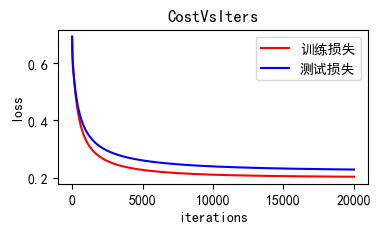

In [44]:
#画损失曲线
fig,ax=plt.subplots(figsize=(4,2))
ax.plot(np.arange(iters),loss_his,'r',label='训练损失')
ax.plot(np.arange(iters), loss_his_t, 'b',label='测试损失')

ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('loss',rotation=90)
ax.set_title('CostVsIters')
plt.show()

#### 预测值

In [45]:
# 使用训练好的模型进行预测、评估
def  predict(X,W):
    probability=sigmoid(X@W)
    y_hat=probability>=0.5
    return probability,y_hat
    
y_train_p,y_train_hat=predict(X_train,W)
y_test_p,y_test_hat=predict(X_test,W)

#### 计算指标

In [46]:
from sklearn.metrics import accuracy_score,precision_score, roc_curve, roc_auc_score,recall_score
acc_train=accuracy_score(y_train,y_train_hat)
precision_train=precision_score(y_train,y_train_hat)

acc_test=accuracy_score(y_test,y_test_hat)
precision_test=precision_score(y_test,y_test_hat)

In [47]:
recall_train=recall_score(y_train,y_train_hat)
recall_test=recall_score(y_test,y_test_hat)
auc_train=roc_auc_score(y_train,y_train_p)
auc_test=roc_auc_score(y_test,y_test_p)
F1_score_train=2*precision_train*recall_train/(precision_train+recall_train)
F1_score_test=2*precision_test*recall_test/(precision_test+recall_test)
fpr_train,tpr_train,th_train=roc_curve(y_train,y_train_p)
fpr_test,tpr_test,th_test=roc_curve(y_test,y_test_p)

In [48]:
print("|{:^20}|{:^18}|".format("  ","测试集"))
print("|{:^20}|{:^20}|".format("precision",precision_test))
print("|{:^20}|{:^20}|".format("recall",recall_test))
print("|{:^20}|{:^20}|".format("F1score",F1_score_test))
print("|{:^20}|{:^20}|".format("AUC",auc_test))
print("|{:^20}|{:^20}|".format("accuracy",acc_test))

|                    |       测试集        |
|     precision      | 0.8571428571428571 |
|       recall       | 0.9230769230769231 |
|      F1score       | 0.888888888888889  |
|        AUC         | 0.967032967032967  |
|      accuracy      |        0.85        |


#### 绘制ROC曲线

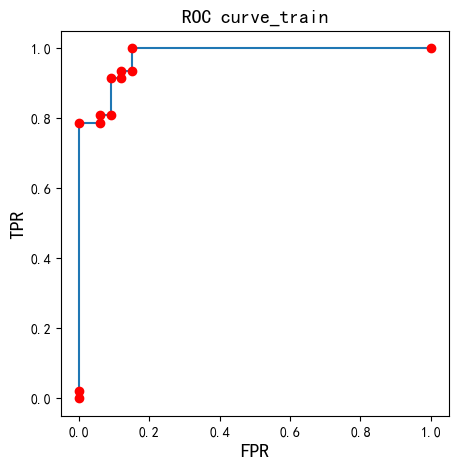

In [49]:
plt.figure(figsize=(5,5))
plt.title('ROC curve_train',fontsize=14)
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_train,tpr_train,'ro')
plt.ylabel('TPR',fontsize=14)
plt.xlabel('FPR',fontsize=14)
plt.show()

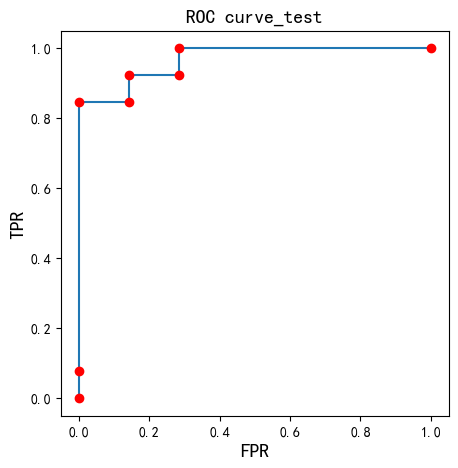

In [50]:
plt.figure(figsize=(5,5))
plt.title('ROC curve_test',fontsize=14)
plt.plot(fpr_test,tpr_test)
plt.plot(fpr_test,tpr_test,'ro')
plt.ylabel('TPR',fontsize=14)
plt.xlabel('FPR',fontsize=14)
plt.show()